# Week 3: Hunting for Regulatory

## 1.1 Do We Have a "Clock" Gene?

* Circadian clock basics – All organisms, from bacteria to humans, have an internal timekeeper (circadian clock) that runs on ~24-hour cycles and controls activity, rest, and physiology. Malfunctions in this clock can lead to disorders like delayed sleep-phase syndrome (DSPS).

* Discovery of clock genes – In the 1970s, Konopka and Benzer identified mutations in flies linked to abnormal circadian rhythms. It took another two decades to find similar clock genes in mammals, and since then, many circadian genes (e.g., timeless, clock, cycle) have been discovered and shown to be conserved across species.

* Importance in plants – Plant survival depends heavily on circadian timing since processes like photosynthesis, light reception, and flowering are controlled by circadian-regulated genes (over 1,000 genes in plants alone).

* Master regulators in plants – The core circadian clock in plants is controlled by three key genes—LHY, CCA1, and TOC1—which interact in a feedback loop. LHY and CCA1 repress TOC1, while TOC1 promotes LHY and CCA1, creating a repeating day-night cycle synchronized by sunlight.

* Transcription factor role & motif finding – The proteins encoded by LHY, CCA1, and TOC1 are transcription factors, which regulate other genes by binding to specific DNA motifs. However, motifs can vary, making them hard to identify, so computational algorithms are needed to discover these hidden regulatory patterns.




##1.2 Motif Finding Is More Difficult Than You Think

* Evening Element Discovery – Steve Kay identified a conserved 9-mer (AAAATATCT) upstream of circadian genes in Arabidopsis thaliana, showing how motifs can regulate time-dependent gene expression.

* Concatenation Pitfall – Simply joining upstream sequences and searching for frequent k-mers can be misleading, since frequent words may appear by chance rather than being true regulatory motifs.

* Conserved vs. Variable Motifs – Some motifs (like the evening element) are highly conserved and easy to detect, while others (like NF-κB sites in flies) are variable, making them harder to identify.

* Toy Example of Motif Implanting – Implanting an identical motif into random DNA strings makes detection trivial with the Frequent Words algorithm, but this doesn’t reflect real biological complexity.

* Impact of Mutations – When motifs are implanted with mutations, simple frequency-based algorithms fail, since the exact k-mer may never appear at all.

* (k,d)-Motif Definition – A (k,d)-motif is a k-mer that appears in every DNA string with at most d mismatches. This models the biological reality better than exact matches.

* Brute Force Enumeration – The MotifEnumeration algorithm guarantees correctness by generating all possible candidates and checking them, but it is computationally slow for larger k and d.

* The Subtle Motif Problem – In realistic datasets, mutated motifs may be so different from each other that they look more like random background noise than related signals, making motif finding computationally and biologically very challenging.

### Excerise of this section
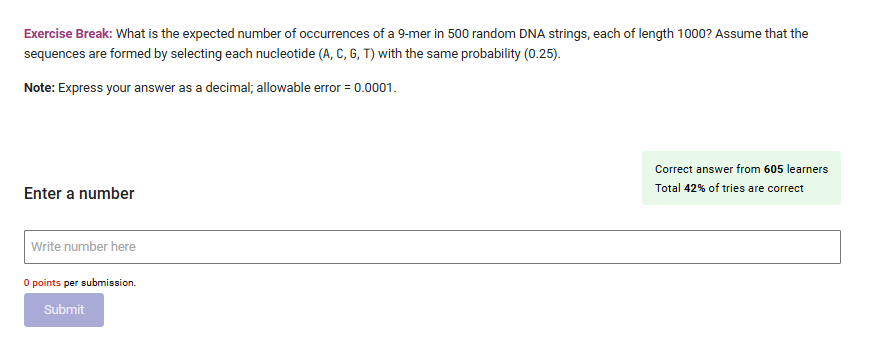

In [1]:
# parameters
seq_length = 1000
mer_length = 9
num_strings = 500
bases_size = 4

# number of possible starting positions for the 9-mer in one string
positions = seq_length - mer_length + 1

# probability a specific 9-mer matches at a position
p_match = (1 / bases_size) ** mer_length

# expected occurrences in one string
expected_one = positions * p_match

# expected occurrences across all strings
expected_total = num_strings * expected_one

print("Expected occurrences in one string:", expected_one)
print("Expected occurrences in all strings:", expected_total)


Expected occurrences in one string: 0.0037841796875
Expected occurrences in all strings: 1.89208984375


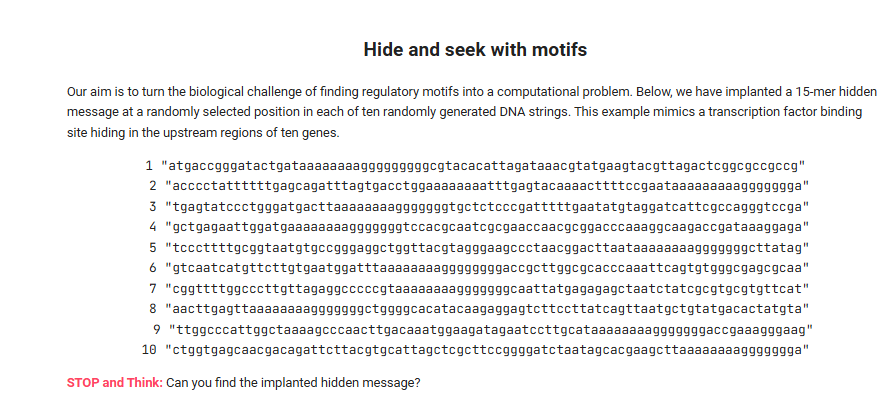

In [2]:
Text = """1 "atgaccgggatactgataaaaaaaagggggggggcgtacacattagataaacgtatgaagtacgttagactcggcgccgccg"
 2 "acccctattttttgagcagatttagtgacctggaaaaaaaatttgagtacaaaacttttccgaataaaaaaaaaggggggga"
 3 "tgagtatccctgggatgacttaaaaaaaagggggggtgctctcccgatttttgaatatgtaggatcattcgccagggtccga"
 4 "gctgagaattggatgaaaaaaaagggggggtccacgcaatcgcgaaccaacgcggacccaaaggcaagaccgataaaggaga"
 5 "tcccttttgcggtaatgtgccgggaggctggttacgtagggaagccctaacggacttaataaaaaaaagggggggcttatag"
 6 "gtcaatcatgttcttgtgaatggatttaaaaaaaaggggggggaccgcttggcgcacccaaattcagtgtgggcgagcgcaa"
 7 "cggttttggcccttgttagaggcccccgtaaaaaaaagggggggcaattatgagagagctaatctatcgcgtgcgtgttcat"
 8 "aacttgagttaaaaaaaagggggggctggggcacatacaagaggagtcttccttatcagttaatgctgtatgacactatgta"
  9 "ttggcccattggctaaaagcccaacttgacaaatggaagatagaatccttgcataaaaaaaagggggggaccgaaagggaag"
10 "ctggtgagcaacgacagattcttacgtgcattagctcgcttccggggatctaatagcacgaagcttaaaaaaaaggggggga"""

In [3]:
# Transforming the text into Uppercase concatenated text
Text = [line.split('"')[1].upper() for line in Text.strip().split('\n') if line.strip()]
final_seq = "".join(Text)

print(final_seq)

ATGACCGGGATACTGATAAAAAAAAGGGGGGGGGCGTACACATTAGATAAACGTATGAAGTACGTTAGACTCGGCGCCGCCGACCCCTATTTTTTGAGCAGATTTAGTGACCTGGAAAAAAAATTTGAGTACAAAACTTTTCCGAATAAAAAAAAAGGGGGGGATGAGTATCCCTGGGATGACTTAAAAAAAAGGGGGGGTGCTCTCCCGATTTTTGAATATGTAGGATCATTCGCCAGGGTCCGAGCTGAGAATTGGATGAAAAAAAAGGGGGGGTCCACGCAATCGCGAACCAACGCGGACCCAAAGGCAAGACCGATAAAGGAGATCCCTTTTGCGGTAATGTGCCGGGAGGCTGGTTACGTAGGGAAGCCCTAACGGACTTAATAAAAAAAAGGGGGGGCTTATAGGTCAATCATGTTCTTGTGAATGGATTTAAAAAAAAGGGGGGGGACCGCTTGGCGCACCCAAATTCAGTGTGGGCGAGCGCAACGGTTTTGGCCCTTGTTAGAGGCCCCCGTAAAAAAAAGGGGGGGCAATTATGAGAGAGCTAATCTATCGCGTGCGTGTTCATAACTTGAGTTAAAAAAAAGGGGGGGCTGGGGCACATACAAGAGGAGTCTTCCTTATCAGTTAATGCTGTATGACACTATGTATTGGCCCATTGGCTAAAAGCCCAACTTGACAAATGGAAGATAGAATCCTTGCATAAAAAAAAGGGGGGGACCGAAAGGGAAGCTGGTGAGCAACGACAGATTCTTACGTGCATTAGCTCGCTTCCGGGGATCTAATAGCACGAAGCTTAAAAAAAAGGGGGGGA


In [21]:
#@title Applying the code we wrote before of Frequentwords (NOTE we must have transformed the text into Uppercase concatenated text to be processable )
# C1: Finding Hidden Messages in DNA
# Week 2: Frequent Words with Mismatches and Reverse Complements

from collections import defaultdict

# --- Helper Functions ---

def hamming_distance(p, q):
    """
    Calculates the Hamming distance between two DNA strings of equal length.

    Args:
        p (str): The first DNA string.
        q (str): The second DNA string.

    Returns:
        int: The number of mismatches between p and q.
    """
    return sum(1 for ch1, ch2 in zip(p, q) if ch1 != ch2)

def reverse_complement(pattern):
    """
    Computes the reverse complement of a DNA string.

    Args:
        pattern (str): The DNA string.

    Returns:
        str: The reverse complement of the pattern.
    """
    complement_map = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return "".join(complement_map.get(base, 'N') for base in reversed(pattern))

def neighbors(pattern, d):
    """
    Recursively generates the d-neighborhood of a pattern. The d-neighborhood
    is the set of all k-mers with Hamming distance at most d from the pattern.

    Args:
        pattern (str): The starting DNA pattern.
        d (int): The maximum allowed Hamming distance.

    Returns:
        set: A set of all k-mers in the d-neighborhood.
    """
    if d == 0:
        return {pattern}
    if len(pattern) == 1:
        return {'A', 'C', 'G', 'T'}

    neighborhood = set()
    suffix_neighbors = neighbors(pattern[1:], d)

    for text in suffix_neighbors:
        if hamming_distance(pattern[1:], text) < d:
            for nucleotide in 'ACGT':
                neighborhood.add(nucleotide + text)
        else:
            neighborhood.add(pattern[0] + text)

    return neighborhood

# --- Core Algorithm ---

def frequent_words_mismatch_rc_FAST(text, k, d):
    """
    Finds the most frequent k-mers (with up to d mismatches and reverse complements)
    in a given DNA text. This is an optimized algorithm suitable for larger datasets.

    Args:
        text (str): The DNA string to analyze.
        k (int): The length of the k-mer.
        d (int): The maximum number of mismatches allowed.

    Returns:
        list: A list of the most frequent k-mers found.
    """
    # 1. First, count only the k-mers that ACTUALLY appear in the text and their complements.
    actual_kmer_counts = defaultdict(int)
    for i in range(len(text) - k + 1):
        pattern = text[i:i+k]
        pattern_rc = reverse_complement(pattern)
        actual_kmer_counts[pattern] += 1
        actual_kmer_counts[pattern_rc] += 1

    # 2. Score candidate patterns by summing counts of all real k-mers in their neighborhood.
    candidate_scores = defaultdict(int)
    for pattern, count in actual_kmer_counts.items():
        neighborhood = neighbors(pattern, d)
        for neighbor in neighborhood:
            candidate_scores[neighbor] += count

    # 3. Find the maximum score among all candidates.
    max_score = 0
    if candidate_scores:
        max_score = max(candidate_scores.values())

    # 4. Collect all k-mers that achieve this maximum score.
    result_patterns = [
        pattern for pattern, score in candidate_scores.items() if score == max_score
    ]

    return result_patterns

# This block allows the script to be run directly from the command line
if __name__ == '__main__':
    # --- Sample Input from the course ---
    # Text = "ACGTTGCATGTCGCATGATGCATGAGAGCT"
    # k = 4, d = 1
    # Expected Output: ATGT ACAT

    # Ask for user input to test with any data
    input_text = input("Enter a DNA string (Text): ")
    input_k = int(input("Enter k-mer length (k): "))
    input_d = int(input("Enter max mismatches (d): "))

    if not input_text:
        print("\nUsing default sample data:")
        input_text = "ACGTTGCATGTCGCATGATGCATGAGAGCT"
        input_k = 4
        input_d = 1
        print(f"Text: {input_text}\nk: {input_k}, d: {input_d}")

    # Calculate the most frequent k-mers
    frequent_patterns = frequent_words_mismatch_rc_FAST(input_text, input_k, input_d)

    # Print the result in the format required by the course (space-separated)
    print("\nMost frequent k-mers (with mismatches and reverse complements):")
    print(" ".join(frequent_patterns))

Enter a DNA string (Text): ATGACCGGGATACTGATAAAAAAAAGGGGGGGGGCGTACACATTAGATAAACGTATGAAGTACGTTAGACTCGGCGCCGCCGACCCCTATTTTTTGAGCAGATTTAGTGACCTGGAAAAAAAATTTGAGTACAAAACTTTTCCGAATAAAAAAAAAGGGGGGGATGAGTATCCCTGGGATGACTTAAAAAAAAGGGGGGGTGCTCTCCCGATTTTTGAATATGTAGGATCATTCGCCAGGGTCCGAGCTGAGAATTGGATGAAAAAAAAGGGGGGGTCCACGCAATCGCGAACCAACGCGGACCCAAAGGCAAGACCGATAAAGGAGATCCCTTTTGCGGTAATGTGCCGGGAGGCTGGTTACGTAGGGAAGCCCTAACGGACTTAATAAAAAAAAGGGGGGGCTTATAGGTCAATCATGTTCTTGTGAATGGATTTAAAAAAAAGGGGGGGGACCGCTTGGCGCACCCAAATTCAGTGTGGGCGAGCGCAACGGTTTTGGCCCTTGTTAGAGGCCCCCGTAAAAAAAAGGGGGGGCAATTATGAGAGAGCTAATCTATCGCGTGCGTGTTCATAACTTGAGTTAAAAAAAAGGGGGGGCTGGGGCACATACAAGAGGAGTCTTCCTTATCAGTTAATGCTGTATGACACTATGTATTGGCCCATTGGCTAAAAGCCCAACTTGACAAATGGAAGATAGAATCCTTGCATAAAAAAAAGGGGGGGACCGAAAGGGAAGCTGGTGAGCAACGACAGATTCTTACGTGCATTAGCTCGCTTCCGGGGATCTAATAGCACGAAGCTTAAAAAAAAGGGGGGGA
Enter k-mer length (k): 15
Enter max mismatches (d): 1

Most frequent k-mers (with mismatches and reverse complements):
AAAAAAAGGGGGGGG CCCCCCCCTTTTTTT


### This is the challenge

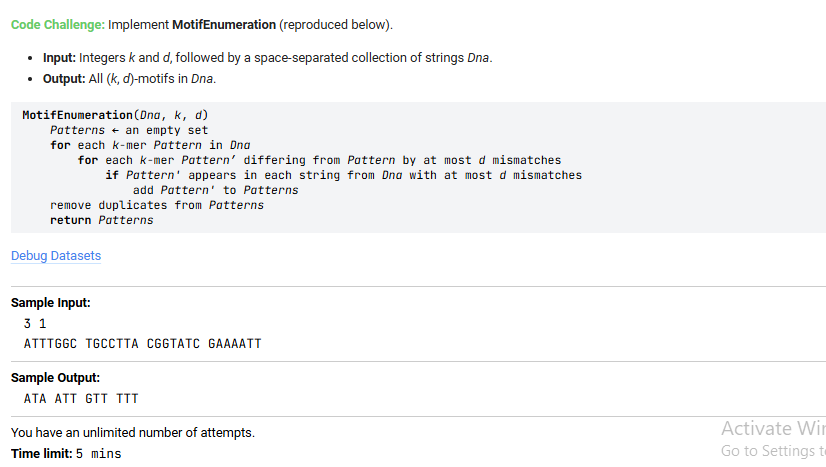

In [5]:
#@title the Neighbour and the Hamming Functions


def HammingDistance(p, q):
     count =0
     for i in range(len(p)):
        if p[i] != q[i]:
            count +=1
     return count
def Neighbors(Pattern, d):
    if d == 0:
        return {Pattern} # Return a set containing the pattern itself
    if len(Pattern) == 1: # Corrected syntax for comparison
        return {'A', 'C', 'G', 'T'}

    Neighborhood = set() # Use a set to store unique neighbors
    SuffixPattern = Pattern[1:] # Get the suffix of the pattern
    SuffixNeighbors = Neighbors(SuffixPattern, d) # Recursive call

    for text in SuffixNeighbors:
        # Calculate Hamming distance between suffix of original pattern and neighbor suffix
        if HammingDistance(SuffixPattern, text) < d:
            # If distance is less than d, we can change the first symbol
            for nucleotide in ['A', 'C', 'G', 'T']:
                Neighborhood.add(nucleotide + text) # Concatenate and add to set
        else:
            # If distance is equal to d, the first symbol must match
            Neighborhood.add(Pattern[0] + text) # Concatenate original first symbol and add

    return Neighborhood

In [6]:
def MotifEnumeration(Dna, k, d):
    """
    Finds all (k, d)-motifs in a list of DNA strings.
    Dna: list of strings
    k: length of motif
    d: max number of mismatches
    """
    Patterns = set()

    for dna_string in Dna:
        for i in range(len(dna_string) - k + 1):
            kmer = dna_string[i:i+k]
            for neighbor in neighbors(kmer, d):
                # Check if neighbor appears in all strings with ≤ d mismatches
                if all(any(hamming_distance(neighbor, dna_string[j:j+k]) <= d
                           for j in range(len(dna_string) - k + 1))
                       for dna_string in Dna):
                    Patterns.add(neighbor)

    return Patterns

In [7]:
#@title The dataset given in the challenge:
Dna = ['GAAGGATGATTACAAGCCCTGGGAT', 'AAAAGGGGGCTGGGTTGAGGGAGGG', 'GGAGTTAAGGATCCTGAGATTCATA', 'GGGTTGATGTCGGACCCAGGTGGAT', 'GAATGACATGTTAGGAATTGGCTGG','TAGATGCGGACTCGTTTAGGTCAGT']
k = 5
d =2

In [8]:
# Code to join the list elements with spaces
print(" ".join(MotifEnumeration(Dna, k, d)))

GCTGT CGTTG ATTTA AGGCA CTGAT CGTGA GATCT TGGGG GTAAA TCGAA CGTTA ACCTG TGCTG GCTGG AGTGT GCTAA TTGCT GGACT GATTA ATGAA CTGCC ACTGG GGCGA TTAGG GCCTA GAGCT GAGGA GACGA AACCG GACTG CTATG TGAGG GAGGT TCTGA AATGT GTGAA GATAG AACGT GCCCG TCAGG GAGAA ATGAC CGGGT CATAG TGAAG ACTGT GGCGT CCGGA CCGGT GCCGA CGCAG TCCGG ATGTT TCATG GTTCA TTAAG AGGTG TGGAT TTTAA ACGTA TATAG GCGGT GTGTT GATTG GGCTT TAGAT AGGGA AAGCT CCTCG AAGGG TTGAT CTTTA ATTAA TATGA AGCAG TTACG AGGTC TTTAT GATGG CGCTC CTTGC AGGGC ACAGA GAGGG GTGAC TAAGA ATCGG TTGTA GATGC GGTAG AGTTG GGGTG CGATG TGTTC TCTAG GCGAA AATAT GAAGG GTTGG TTTGG CCGTT TTAGT AGGTA GGTTC GAACG ACCGG ATGTG TGATA TGTAT GGTGA TACAG AGAAC CGCTG GGATA CGTGT ACGAG ATGGG GCTTA AGTCG AAGAG GTCGT GAGAT GTTTG AGTTC CCTGT GATCA GCTGA TTCGA GGACG CGGAA TGCAT AAATC ATTGT TGATC ACGGG TGGGT GCCCT AATGG GGTGT GACCG GGTGC AGGAT TGGGC TGACG GGTCA GGAAT GGAAG GTCTT GTGCG GTGGG TTAAT TGGGA ACTTG GCCTC TTGAG GCAAG TGTGC TTTTA GTTGC ATGCT CGTGG ACAAG TAATG TGCGG AGAAG GGGTT GAGA

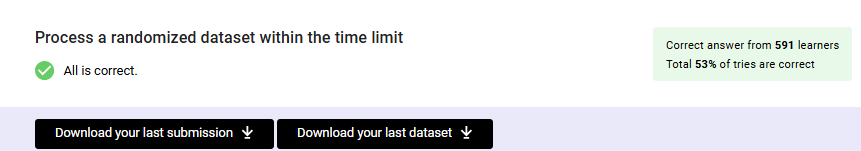

## 1.3 Scoring Motifs

1.  **Limitations of Simple Motif Models:** The "Implanted Motif Problem" is too rigid for real-world biological data, which is often noisy. A more flexible approach is needed that doesn't require a motif to be present in every single sequence.

2.  **The Motif Matrix Framework:** To analyze potential motifs, a "motif matrix" is constructed by selecting one *k*-mer (a sequence of length *k*) from each DNA string. The primary goal is to select the set of *k*-mers that forms the most "conserved" matrix.

3.  **Profile Matrices and Consensus Strings:** From the motif matrix, a **profile matrix** is created to show the frequency of each nucleotide (A, C, G, T) in each column. The **consensus string** is then derived from this profile, representing the most frequent nucleotide at each position.

4.  **A Basic Scoring Method:** A simple way to score a motif matrix is to count the number of "unpopular" (less frequent) nucleotides. The objective is to find a set of *k*-mers that minimizes this score.

5.  **Entropy as a More Nuanced Score:** The simple scoring method has flaws, as it doesn't distinguish well between different distributions of unpopular nucleotides. **Entropy** is introduced as a superior measure that quantifies the uncertainty in each column of the profile matrix; lower entropy indicates higher conservation.

6.  **Visualization with Motif Logos:** A **motif logo** is a visual representation of a motif's conservation. The total height of the stacked letters in each column is based on its information content (derived from entropy), with taller columns indicating more highly conserved positions.

### Exercise:
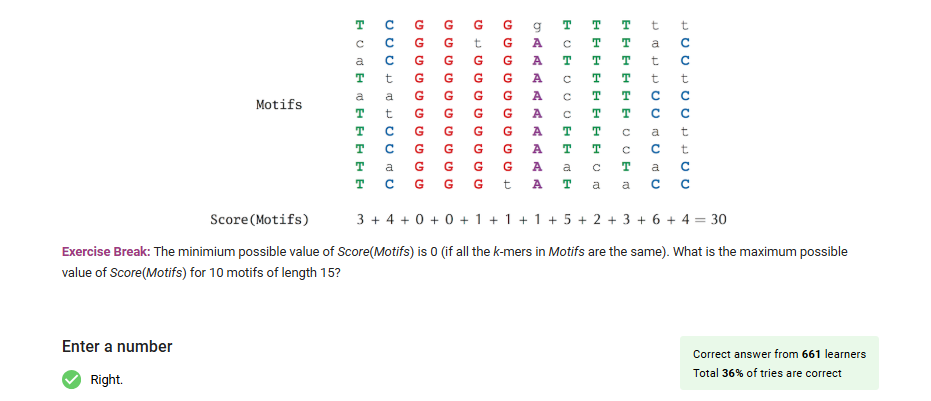

In [9]:
#The score is the total number of "unpopular" letters
# And to maximize the Score for One Column we need to make the count of the most frequent nucleotide as small as possible in each column.
# An even distribution of 10 nucleotides among 4 types would be: 3, 3, 2, 2. (For example, 3 A's, 3 C's, 2 G's, and 2 T's).
# In this case, the count of the most frequent nucleotide is 3.
# The maximum score for a single column is therefore 10 - 3 = 7.
"""
the total maximum score is:
(Maximum score per column) × (Number of columns)
= 7 × 15
= 105
"""

'\nthe total maximum score is:\n(Maximum score per column) × (Number of columns)\n= 7 × 15\n= 105\n'

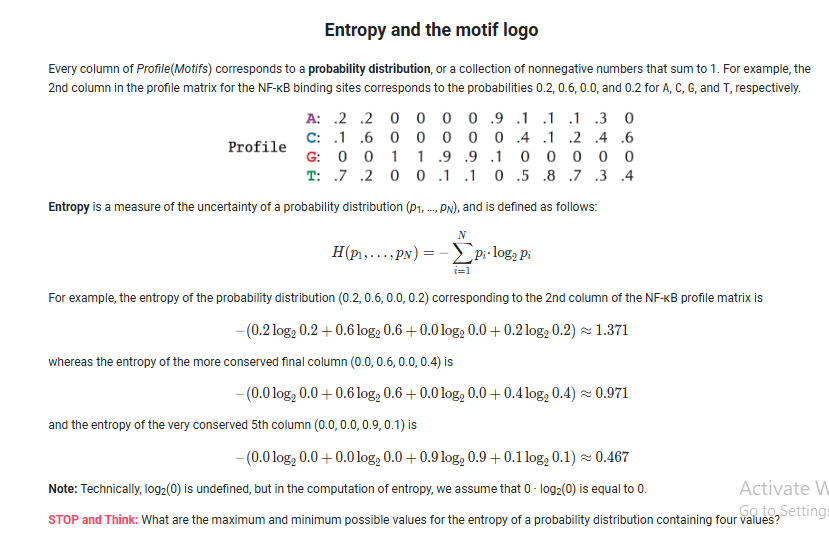

In [10]:
import math

# Probability distributions
Pmin = [1.0, 0.0, 0.0, 0.0]       # Minimum entropy distribution
Pmax = [0.25, 0.25, 0.25, 0.25]   # Maximum entropy distribution

def entropy(P):
    return -sum(p * math.log2(p) for p in P if p > 0)

Entropymin = int(entropy(Pmin))
Entropymax = entropy(Pmax)

print(f"Minimum Entropy: {Entropymin}")
print(f"Maximum Entropy: {Entropymax}")


Minimum Entropy: 0
Maximum Entropy: 2.0


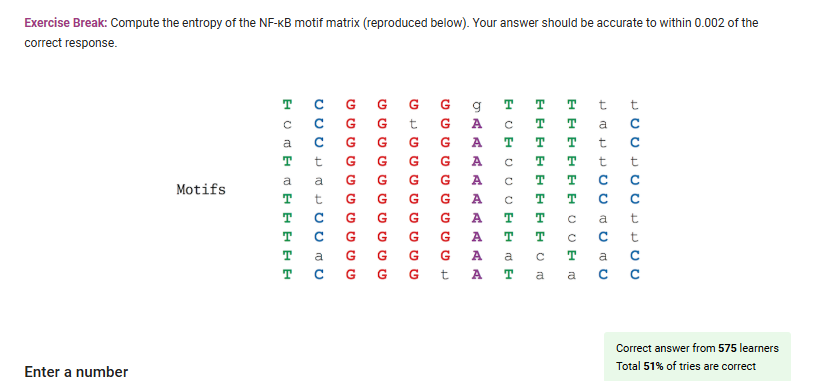

In [11]:
#The entropy of a motif matrix is  the sum of the entropies of its columns.
#Probability distribution of Each column is the propotions of all nucleotides.
import math
motifs = [
    ['T', 'C', 'G', 'G', 'G', 'G', 'G', 'T', 'T', 'T', 'T', 'T'],
    ['C', 'C', 'G', 'G', 'T', 'G', 'A', 'C', 'T', 'T', 'A', 'C'],
    ['A', 'C', 'G', 'G', 'G', 'G', 'A', 'T', 'T', 'T', 'T', 'C'],
    ['T', 'T', 'G', 'G', 'G', 'G', 'A', 'C', 'T', 'T', 'T', 'T'],
    ['A', 'A', 'G', 'G', 'G', 'G', 'A', 'C', 'T', 'T', 'C', 'C'],
    ['T', 'T', 'G', 'G', 'G', 'G', 'A', 'C', 'T', 'T', 'C', 'C'],
    ['T', 'C', 'G', 'G', 'G', 'G', 'A', 'T', 'T', 'C', 'A', 'T'],
    ['T', 'C', 'G', 'G', 'G', 'G', 'A', 'T', 'T', 'C', 'C', 'T'],
    ['T', 'A', 'G', 'G', 'G', 'G', 'A', 'A', 'C', 'T', 'A', 'C'],
    ['T', 'C', 'G', 'G', 'G', 'T', 'A', 'T', 'A', 'A', 'C', 'C']
]

def calculate_probability_distribution(motifs):
    # transpose motifs to columns
    transposed = [''.join(col) for col in zip(*motifs)]
    distributions = []
    for col in transposed:
        counts = {nuc: col.count(nuc)/len(col) for nuc in "ACGT"}
        distributions.append(counts)
    return distributions

def entropy_motifs(motifs):
    cols_distrs = calculate_probability_distribution(motifs)
    total_entropy = 0
    for col in cols_distrs:
        col_entropy = -sum(p * math.log2(p) for p in col.values() if p > 0)
        total_entropy += col_entropy
    return total_entropy

print(entropy_motifs(motifs))


9.916290005356972


In [92]:
calculate_probability_distribution(motifs)

[{'A': 0.2, 'C': 0.1, 'G': 0.0, 'T': 0.7},
 {'A': 0.2, 'C': 0.6, 'G': 0.0, 'T': 0.2},
 {'A': 0.0, 'C': 0.0, 'G': 1.0, 'T': 0.0},
 {'A': 0.0, 'C': 0.0, 'G': 1.0, 'T': 0.0},
 {'A': 0.0, 'C': 0.0, 'G': 0.9, 'T': 0.1},
 {'A': 0.0, 'C': 0.0, 'G': 0.9, 'T': 0.1},
 {'A': 0.9, 'C': 0.0, 'G': 0.1, 'T': 0.0},
 {'A': 0.1, 'C': 0.4, 'G': 0.0, 'T': 0.5},
 {'A': 0.1, 'C': 0.1, 'G': 0.0, 'T': 0.8},
 {'A': 0.1, 'C': 0.2, 'G': 0.0, 'T': 0.7},
 {'A': 0.3, 'C': 0.4, 'G': 0.0, 'T': 0.3},
 {'A': 0.0, 'C': 0.6, 'G': 0.0, 'T': 0.4}]

## 1.4 From Motif Finding to Finding a Median String

1.  **The Original Problem is Inefficient:** The initial "Motif Finding Problem" is solved by `BruteForceMotifSearch`, which checks every possible combination of *k*-mers from the DNA strings. This approach is computationally explosive and impractical for realistic datasets.

2.  **A Shift in Perspective:** The core idea is to reformulate the problem. Instead of starting with all possible sets of motifs to find a consensus string (`Motifs → Consensus`), the approach is flipped: start with all possible candidate consensus strings (`Pattern`) and find the best-matching motifs for each one (`Pattern → Motifs`).

3.  **The Key Insight: Row vs. Column Scoring:** The text reveals that `Score(Motifs)`, calculated by counting mismatches in each **column**, is mathematically identical to summing the **Hamming distances** between each individual motif string and the consensus string (i.e., counting mismatches in each **row**).

4.  **Introducing `d(Pattern, Dna)`:** A new distance function, `d(Pattern, Dna)`, is defined. It measures the total minimum distance from a candidate *k*-mer `Pattern` to a set of DNA sequences.

5.  **How `d(Pattern, Dna)` Works:** To calculate this total distance, you take the candidate `Pattern` and, for each long DNA string, find the *k*-mer inside it that has the *smallest* Hamming distance to the `Pattern`. You then sum up these minimum distances.

6.  **The New Formulation: The Median String Problem:** The original problem is now reframed as the "Median String Problem." The goal is to find the single *k*-mer `Pattern`, called the **median string**, that minimizes the total distance `d(Pattern, Dna)` over all 4^k possible *k*-mers.

7.  **A New Brute-Force Algorithm (`MedianString`):** The solution to the Median String Problem involves iterating through all 4^k possible *k*-mers (from AAAA...A to TTTT...T), calculating `d(Pattern, Dna)` for each, and returning the `Pattern` with the minimum score.

8.  **Dramatic Improvement in Runtime:** The `MedianString` algorithm's runtime is O(4^k · n · k · t). This is much better than the original O(n^t · k · t) because `k` (motif length) is usually a small number, making 4^k far more manageable than n^t.

9.  **The Main Takeaway:** This section teaches a crucial lesson in algorithm design: simply rethinking or reformulating a problem can lead to a dramatically faster and more practical solution, even if both algorithms are technically "brute-force."

10. **Remaining Limitations:** Despite its improvement, the `MedianString` algorithm is still too slow for larger, biologically relevant motif lengths (e.g., *k* > 15), as the 4^k search space becomes computationally prohibitive. This indicates that even better (often approximate) algorithms are still needed.

### Creating the BruteForceMotifSearch

In [1]:
import itertools
from collections import Counter

def score_motifs(motifs):
    """
    Calculates the score of a collection of k-mers (motifs).
    The score is the sum of non-consensus nucleotides over all columns.

    Args:
        motifs (list of str): A list of k-mer strings of the same length.

    Returns:
        int: The total score of the motif matrix.
    """
    if not motifs:
        return 0

    k = len(motifs[0])  # Length of the motifs (number of columns)
    t = len(motifs)     # Number of motifs (number of rows)
    total_score = 0

    # Iterate through each column of the motif matrix
    for j in range(k):
        # Get all nucleotides in the current column
        column = [motifs[i][j] for i in range(t)]

        # Count the occurrences of each nucleotide in the column
        counts = Counter(column)

        # Find the count of the most frequent nucleotide
        max_count = 0
        if counts: # Check if the column is not empty
            max_count = max(counts.values())

        # The score for this column is the number of mismatches (t - max_count)
        column_score = t - max_count
        total_score += column_score

    return total_score


def brute_force_motif_search(Dna, k):
    """
    Finds the best collection of k-mers (one from each string in Dna)
    that minimizes the motif score.

    Args:
        Dna (list of str): A collection of DNA strings.
        k (int): The length of the motifs to find.

    Returns:
        list of str: The collection of k-mers with the minimum possible score.
    """
    n = len(Dna[0]) # Assuming all strings have the same length

    # 1. Generate a list of all possible k-mers for each DNA string
    all_kmers_per_string = []
    for dna_string in Dna:
        kmers_in_string = [dna_string[i:i+k] for i in range(n - k + 1)]
        all_kmers_per_string.append(kmers_in_string)

    best_score = float('inf')
    best_motifs = []

    # 2. Iterate through the Cartesian product of all possible k-mers
    # This generates every single combination of motifs.
    for current_motifs_tuple in itertools.product(*all_kmers_per_string):
        current_motifs = list(current_motifs_tuple)

        # 3. Score the current combination
        current_score = score_motifs(current_motifs)

        # 4. If this combination is better than the best we've seen, update
        if current_score < best_score:
            best_score = current_score
            best_motifs = current_motifs

    return best_motifs

In [13]:
k = 3
Dna = ["GGCGTCA", "GCCGTCA", "GGCATCA"]
brute_force_motif_search(Dna, k)

['TCA', 'TCA', 'TCA']

### Creating The Equilvant Motif Finding

In [2]:
import itertools
from collections import Counter

def hamming_distance(s1, s2):
    """Calculates the Hamming distance between two strings of equal length."""
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

def find_consensus(motifs):
    """
    Finds the consensus string for a given collection of motifs.
    Ties are broken alphabetically (A > C > G > T is not standard, but we need a rule).
    A better rule is alphabetical: A, C, G, T.

    Args:
        motifs (list of str): A list of k-mer strings.

    Returns:
        str: The consensus string.
    """
    if not motifs:
        return ""

    k = len(motifs[0])
    consensus = ""

    for j in range(k):
        column = [motifs[i][j] for i in range(len(motifs))]
        counts = Counter(column)

        # Robust tie-breaking: find the max count, then find all chars with that count,
        # sort them alphabetically, and pick the first one.
        max_count = max(counts.values())
        best_chars = sorted([char for char, count in counts.items() if count == max_count])
        consensus += best_chars[0]

    return consensus

def calculate_d_pattern_motifs(pattern, motifs):
    """Calculates the sum of Hamming distances from a pattern to each motif."""
    total_distance = 0
    for motif in motifs:
        total_distance += hamming_distance(pattern, motif)
    return total_distance

def equivalent_motif_finding(Dna, k):
    """
    Solves the Equivalent Motif Finding Problem.

    Finds a k-mer Pattern and a collection of k-mers Motifs (one from each
    string in Dna) that minimize d(Pattern, Motifs).

    Args:
        Dna (list of str): A collection of DNA strings.
        k (int): The length of the motifs.

    Returns:
        tuple: (best_pattern, best_motifs)
    """
    n = len(Dna[0])

    # 1. Generate all possible k-mers for each DNA string
    all_kmers_per_string = [
        [dna_string[i:i+k] for i in range(n - k + 1)] for dna_string in Dna
    ]

    min_total_distance = float('inf')
    best_pattern = None
    best_motifs = None

    # Iterate through every possible combination of motifs
    for current_motifs_tuple in itertools.product(*all_kmers_per_string):
        current_motifs = list(current_motifs_tuple)

        # 2. For this set of motifs, find the best pattern (the consensus string)
        consensus_pattern = find_consensus(current_motifs)

        # 3. Calculate the distance d(Pattern, Motifs)
        current_distance = calculate_d_pattern_motifs(consensus_pattern, current_motifs)

        # 4. If this is the best score so far, update everything
        if current_distance < min_total_distance:
            min_total_distance = current_distance
            best_pattern = consensus_pattern
            best_motifs = current_motifs

    return best_pattern, best_motifs

In [15]:
# Example Dataset
k_example = 3
Dna_example = ["GGCGTCA", "GCCGTCA", "GGCATCA"]

# Run the equivalent motif finding search
equivalent_motif_finding(Dna_example, k_example)

('TCA', ['TCA', 'TCA', 'TCA'])

### creating the Median String function

In [11]:
import itertools

def hamming_distance(s1, s2):
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

def d_pattern_text(pattern, text):
    k = len(pattern)
    return min(hamming_distance(pattern, text[i:i+k]) for i in range(len(text) - k + 1))

def d_pattern_dna(pattern, Dna):
    return sum(d_pattern_text(pattern, text) for text in Dna)

def median_strings(Dna, k):
    min_distance = float('inf')
    medians = []
    for kmer_tuple in itertools.product('ACGT', repeat=k):
        pattern = "".join(kmer_tuple)
        dist = d_pattern_dna(pattern, Dna)
        if dist < min_distance:
            min_distance = dist
            medians = [pattern]
        elif dist == min_distance:
            medians.append(pattern)
    return medians, min_distance

In [12]:
Dna_example = ["AAATTGACGCAT", "GACGACCACGTT", "CGTCAGCGCCTG","GCTGAGCACCGG","AGTTCGGGACAG"]
k_example = 3
median_strings(Dna_example, k_example)

(['GAC'], 2)

In [13]:
Dna_example2 = ["CTCGATGAGTAGGAAAGTAGTTTCACTGGGCGAACCACCCCGGCGCTAATCCTAGTGCCC", "GCAATCCTACCCGAGGCCACATATCAGTAGGAACTAGAACCACCACGGGTGGCTAGTTTC", "GGTGTTGAACCACGGGGTTAGTTTCATCTATTGTAGGAATCGGCTTCAAATCCTACACAG"]
k_example2 = 7
median_strings(Dna_example2, k_example2)

(['AATCCTA', 'GAACCAC', 'GTAGGAA', 'TAGTTTC'], 0)

In [18]:
Text = """6
TGGTCACCTCTTGTATGGGACTTGTCCACGATGGTCATAATG
TAAACATTACGTACAAATTGTAGCTCAGTCGTAAGGCACCTC
TAGGACTGCACGGTGATCCGTTACTCCGGGGTAGGGTGGGGC
AGAAGCGTAAGGCACAAATCCGCTCTGTAATTTCTCCCTCCT
GTACGGCAATACCAATACCTCGCGATGGAGAATACTTGAGCT
GTAGGGGTCCCAGTGGAGAGCCATAAATCGACCGATGCTAGG
GGGCGATTACAGAGCAACCTAGGCCAGCCCCAAGAGGTACGG
GGGGGGCAATTCTACGTTCAAACCCCTGGAGTATGGGTTGCG
TTTCCAGTACTTTCCAAAATTTTATCATGTACTATAGTAGGG
CAGGGTCATGCTACATATTAAAGTGTATGGATAAAAATTCGC"""
InputText =Text.replace("\n", ",")
K_input = int(InputText.split(",")[0])
Dna_input = InputText.split(",")[1:]

median_string(Dna_input, K_input)

'GTAGGG'

In [19]:
def Dist(Pattern, Text):
    """
    Calculate the minimum Hamming distance between a given pattern and text.

    Parameters:
    Pattern (str): The pattern to match.
    Text (str): The text to search the pattern in.

    Returns:
    int: The minimum Hamming distance between the pattern and text.
    """
    # Initialize a list to store the Hamming distances at each position
    Distances = [] # Changed variable name to avoid conflict with function name
    # Iterate through the text, calculating the Hamming distance of substrings of the same length as the pattern
    for i in range(len(Text) - len(Pattern) + 1):
        # Append the calculated Hamming distance to the list
        # Corrected function call to use the correctly named hamming_distance
        Distances.append(hamming_distance(Pattern, Text[i:i+len(Pattern)]))
    # Return the minimum value in the list, which is the minimum Hamming distance
    return min(Distances)

def Dist2(k, Dna):
    """
    Calculate the minimum sum of distances between each k-mer and all other sequences in the given list of DNA sequences,
    and return the k-mer with the smallest distance sum.

    Parameters:
    k (int) -- The length of the k-mer.
    Dna (list) -- A list of DNA sequences.

    Returns:
    key (str) -- The k-mer with the smallest distance sum.
    """
    # Initialize a dictionary to store the sum of distances for each k-mer
    dist2 = {}

    # Iterate through each DNA sequence
    for i in range(len(Dna)):
        # Iterate through all possible k-mers in the current DNA sequence
        for j in range(len(Dna[i]) - k + 1):
            # Extract the current k-mer
            Pattern = Dna[i][j:j+k]
            # Initialize the distance sum to 0
            dist = 0
            # Iterate through all DNA sequences, calculate the distance between the current k-mer and each sequence,
            # and add it to the distance sum
            for l in range(len(Dna)):
                dist += Dist(Pattern, Dna[l])
            # Add the current k-mer and its distance sum to the dictionary
            dist2[Pattern] = dist

    # Find the minimum distance sum in the dictionary
    Min = min(dist2.values())
    # Iterate through all k-mers in the dictionary to find the one with the smallest distance sum
    for key in dist2.keys():
        if dist2[key] == Min:
            # Return the k-mer with the smallest distance sum
            return key

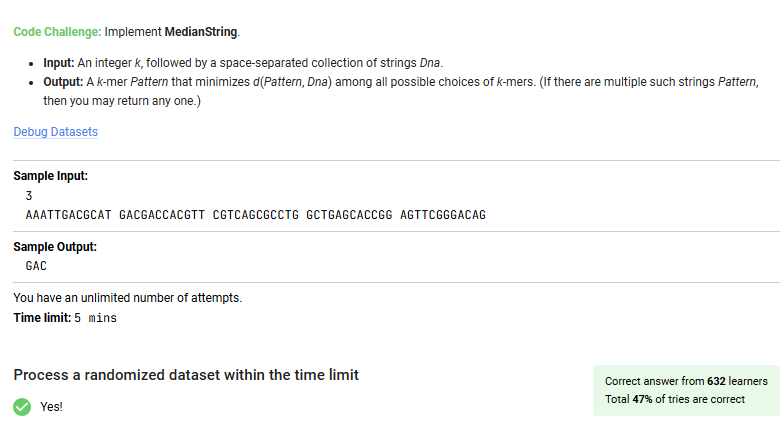

In [20]:
# Corrected function call with arguments in the correct order
Dist2(K_input, Dna_input)

'GTATGG'

# 1.5 Greedy Motif Search



This text describes a fast but often inaccurate algorithm for finding motifs (short, recurring patterns) in DNA called **GreedyMotifSearch**.

#### Key Concepts

1.  **Greedy Algorithms:** These algorithms make the "best" or "most attractive" choice at each step, hoping to find a good overall solution. They are fast heuristics that trade accuracy for speed and often find approximate, not exact, solutions.
2.  **Profile Matrix:** A profile is a matrix that represents a set of motifs. For each position in the motif, it stores the probability of finding each nucleotide (A, C, G, T). This profile can be used to score any given k-mer (a sequence of length k) by calculating the probability that the profile would have generated it.
3.  **Profile-most Probable k-mer:** This is the k-mer within a longer DNA string that has the highest probability of being generated by a given Profile Matrix.

---

#### The GreedyMotifSearch Algorithm

The algorithm attempts to build a collection of the best possible motifs, one from each DNA string.

1.  **Initialization:** It starts by tentatively selecting the first k-mer from every DNA string as the initial "Best Motifs."
2.  **Iteration:** It then loops through every k-mer in the *first* DNA string, treating each one as a potential starting point (`Motif1`).
3.  **Building Motifs Iteratively:** For a given `Motif1`:
    *   It creates a profile based *only* on `Motif1`.
    *   It uses this profile to find the "Profile-most probable" k-mer in the *second* DNA string.
    *   It updates the profile to include both of these motifs.
    *   It uses the new, updated profile to find the best motif in the *third* string, and so on, until it has selected one motif from every string.
4.  **Scoring and Updating:** After building a full set of motifs, it scores them. If this set's score is better than the current "Best Motifs," it replaces them.
5.  **Conclusion:** The process repeats for every possible starting k-mer in the first string. The final "Best Motifs" collection is the result.

---

#### The Major Flaw: The Zero-Probability Problem

Despite its logical structure, the algorithm has a critical flaw that makes it perform poorly.

*   When the algorithm starts building a set of motifs from a single k-mer (e.g., `ACCT`), the initial profile is extremely specific. It will assign a probability of 1 to A in the first position, C in the second, etc., and a probability of **zero** to all other nucleotides at those positions.
*   As a result, when it searches the next DNA string, any k-mer that isn't *exactly* `ACCT` will have a calculated probability of zero.
*   This means the algorithm gets locked into its initial choice and can only find the motif if the **exact same k-mer** appears in the subsequent strings, which is highly unlikely in real biological data where motifs have variations. This prevents it from discovering similar but non-identical motifs.

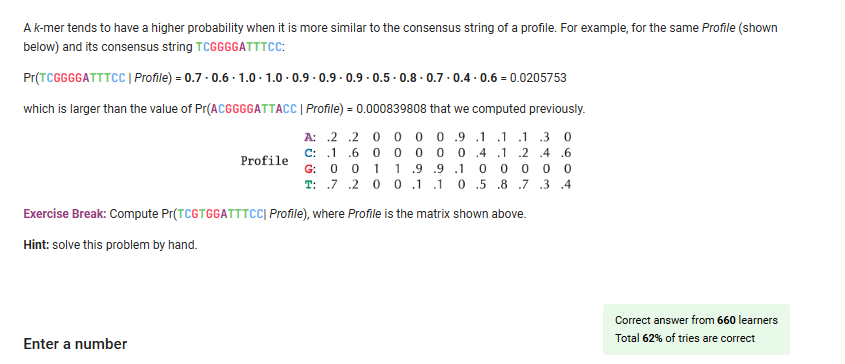

In [89]:
# To calculate Pr(TCGTGGATTTCC | Profile) by simply multiplying nucleotides probability in the profile matrix.
Profile = {
    'A': [0.2, 0.2, 0,0,0,0,0.9,.1, 0.1, 0.1,.3,0],
    'C': [0.1, 0.6,0,0,0,0,0,.4,.1,.2,.4,.6],
    'G': [0,0,1,1,.9,.9,.1,0,0,0,0,0],
    'T': [.7,.2,0,0,.1,.1,0,0.5,.8,.7,.3,.4]
}
Pattern = 'TCGTGGATTTCC'
def Probability_ofPattern(Pattern,Profile):
    Probability_list = []
    for i in range(len(Pattern)):
        Probability_list.append(float(Profile[Pattern[i]][i]))

    # Calculate the product of probabilities
    product = 1
    for p in Probability_list:
        product *= p
    Print = [f"Probabilitie are {Probability_list}" ,f"Probability of {Pattern} is {product}"]
    return Print

In [90]:
Probability_ofPattern(Pattern,Profile)

['Probabilitie are [0.7, 0.6, 1.0, 0.0, 0.9, 0.9, 0.9, 0.5, 0.8, 0.7, 0.4, 0.6]',
 'Probability of TCGTGGATTTCC is 0.0']

### Hey , Correct ✅
Hint: the 4th T with zero probability caused to be zero
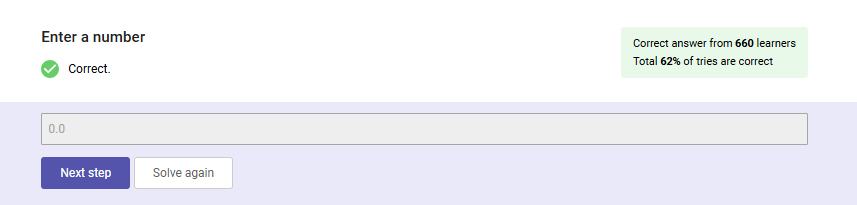

### Profile-most Probable k-mer Problem ⁉

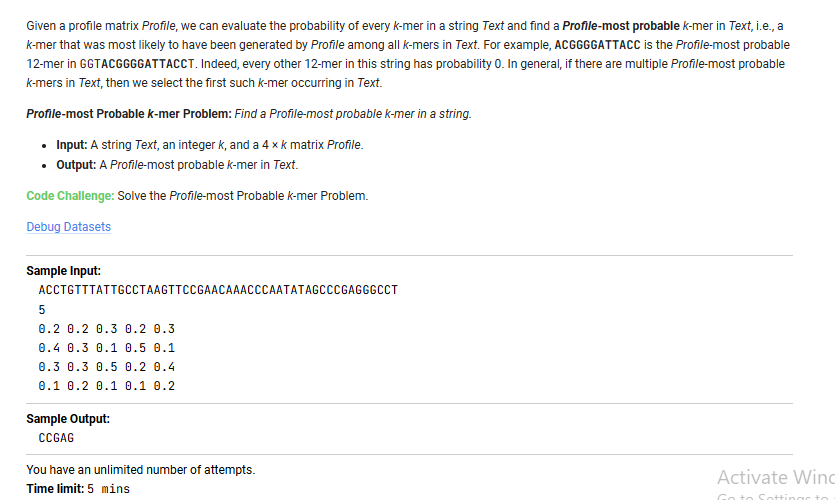

In [86]:
#@title Transforming Dataset into Function based inputs
Dataset = """ GACCCCGAAAAGTAAATTAATTCTAGGACTTCCTAATAGCCGTACTTCCTTGGGCGAAAGGATATGGCTATACATCCTGCCCATTGGTAAACAGCCTGAGTGTGGTACTAGGATCTGCCCCCCTCCCTCTCAGCCAGTGAGCGCCTCAGGCGATGTATACCCAACGACAACCTGTGCCAGTCGACCACTTGTCTTGTCAGACTTGATCGAGCCACCGGAGTCAGGGGACCACATGCTCAGACGGCCTTTACGTCTGCAAATAATGCCATTCGTTTATGCTTGAACACCCTGCCTTTGGATTCAGTCCCCCTGTTGAGCTCGTCACATGTTGACCACTGAACTGGCCAAGCTTTAGCCTTATGCAAAGTAATCTTACCAGTTGGCCTTTATCACATAAAACCTCCTCGGCCCTTTCACCACCTTCGCGTGGGCCCGGTATTGGTTCTCGGAGCAGCCATTGGCATTCAGCAGGCCGTCAGCACCTCAGTACTGCATAGTTTAATAGGATAAAGAACTCAGTTGTCACTCGTCTAGCCCCGAGTGGCCAGCAATAACTAGCCTCCAATAACAAACGTTGACTGAAGGCGTAAATTCCATAATAATATCGAGTGGGGCTGGGGCCGATTGCATACACGTACAATTCATCCTTCATACACTGACACGGGCAGTGTAGAAATTTAACAGGCGCGGTTGTATGTCATATCGAATACGTAGGACAACGATGTCTCAAGGCGTCTAGCTGACAATTACTGCAAACACCTAGTAGTAGACTCTTCGCCGTACGTCTGAACGGGGGCGACTGTATTTGCCAGTGAGTCTCAATCGTTATTTGGAACGCATTGTATCAACTCAATTATGCATTTTTATCGTACTTGTTAAGATAACATGTGACCCACTCTCGGCGGAATAGTCTCCCACGCCCCTTTAAAAGGTTCGTCACCGTTAAAAGTACTTAGACCGGCCCATAGCCCGTAGGATCCAGCAGGAGAATAGTGTCGAA
13
0.184 0.158 0.289 0.132 0.158 0.263 0.276 0.303 0.303 0.25 0.355 0.211 0.276
0.25 0.25 0.289 0.289 0.105 0.289 0.276 0.211 0.224 0.25 0.237 0.25 0.184
0.263 0.329 0.237 0.276 0.434 0.224 0.211 0.197 0.276 0.171 0.211 0.316 0.224
0.303 0.263 0.184 0.303 0.303 0.224 0.237 0.289 0.197 0.329 0.197 0.224 0.316
"""
Text = Dataset.strip().split("\n")[0]
k = int(Dataset.strip().split("\n")[1])
Profile = {
    'A': [float(x) for x in Dataset.strip().split("\n")[2].split()],
    'C': [float(x) for x in Dataset.strip().split("\n")[3].split()],
    'G': [float(x) for x in Dataset.strip().split("\n")[4].split()],
    'T': [float(x) for x in Dataset.strip().split("\n")[5].split()],
}



In [91]:
def Probability_ofPattern(Pattern,Profile):
    Probability_list = []
    for i in range(len(Pattern)):
        Probability_list.append(float(Profile[Pattern[i]][i]))

    # Calculate the product of probabilities
    product = 1
    for p in Probability_list:
        product *= p
    Print = [f"Probabilitie are {Probability_list}" ,f"Probability of {Pattern} is {product}"]
    return product #Print

In [87]:
# To solve this problem we will develop the following function
def Profile_most_probable_kmer(Text, k,Profile):
     kmers_with_probability = {}
     for i in range(len(Text)-k+1):
        pattern=Text[i:i+k]
        #Here we use the function of Probability_ofPattern
        kmers_with_probability.update({pattern:Probability_ofPattern(pattern, Profile)})
     most_probable = max(kmers_with_probability, key=kmers_with_probability.get)
     return most_probable

In [88]:
#Applying the function to the dataset :
Profile_most_probable_kmer(Text, k,Profile)

'GTCTGCAAATAAT'

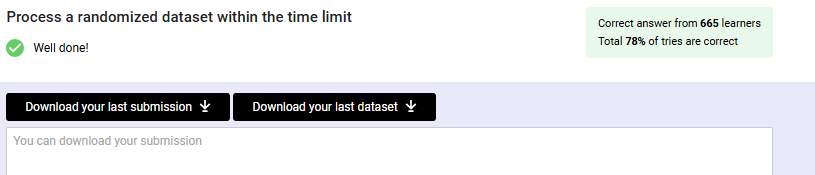

## I liked this one
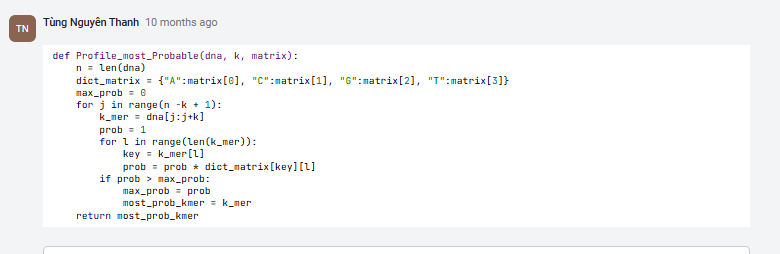

### The GreedyMotifSearch Function

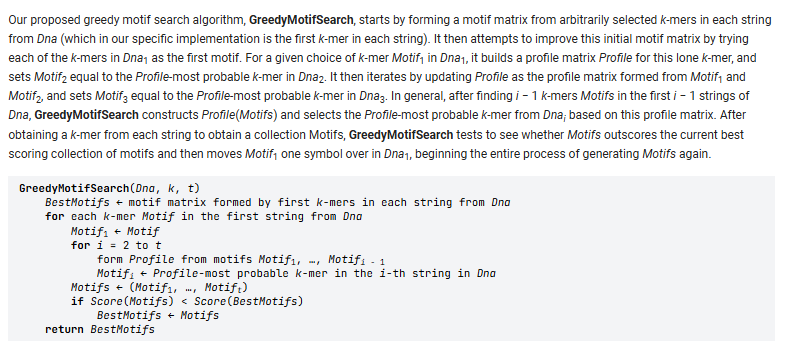

In [97]:
def GreedyMotifSearch(Dna, k, t):
    # Step 1: start with first k-mers in each string
    BestMotifs = [dna[0:k] for dna in Dna]

    # Step 2: loop over all possible k-mers in the first string
    for i in range(len(Dna[0]) - k + 1):
        Motifs = [Dna[0][i:i+k]]   # Motif1
        # Step 3: for each subsequent string
        for j in range(1, t):
            profile = Profile(Motifs)  # build profile from current motifs
            Motifs.append(Profile_most_probable_kmer(Dna[j], k, profile))
        # Step 4: compare score
        if score_motifs(Motifs) < score_motifs(BestMotifs):
            BestMotifs = Motifs
    return BestMotifs


In [98]:
def Count(Motifs):
    k = len(Motifs[0])
    count = {symbol: [0]*k for symbol in "ACGT"}
    for motif in Motifs:
        for j, symbol in enumerate(motif):
            count[symbol][j] += 1
    return count

def Profile(Motifs):
    t = len(Motifs)
    count = Count(Motifs)
    profile = {s: [c/t for c in count[s]] for s in "ACGT"}
    return profile


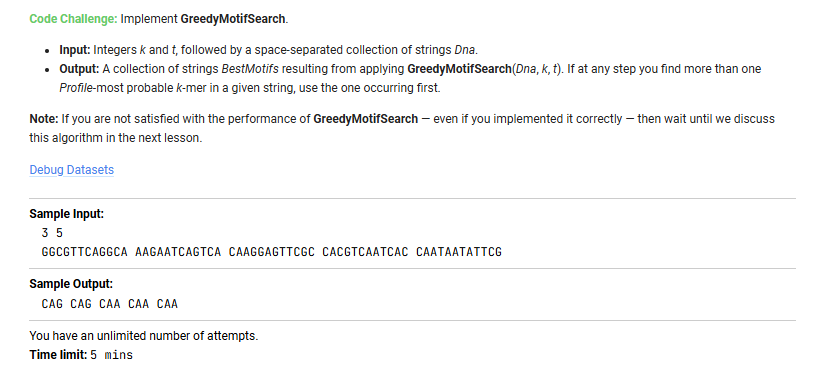

In [117]:
#@ Dataset set given in the challenge
# Include the dataset parsing logic here to ensure Dna, k, and t are defined
dataset = """12 25
TACCGAAACGACGTTAACAGCTGACACGATACTGCAAATCGCGTCTAGTGTCAATAGACAGGACTCGCGCCCGAAAACGGTAGACCCGTCCAAGCCGCATGCATGAGTTCTAACTGGTTAGATGAGTGTACTACAAGAAACTACGACGGGGGATGC TTTACTATTTCACATACACGCGGCGCTAACCTCCATTAATCATCCACTTCGCAGCTCATGTGTCTCATGACGACCGTCAAACCCCCTAGGGACGCTTTGGCAGAGCGTAAATTCTCAACGGGTACGCTGTGACCAGCAGTGACCGAGGTTTAGGGG AATTGTCTAAAGATTTCGCACCATACCAAAGGTAGTACCGGCCTTTTTATTAACAAATGTGGTGCGCCGTCGTAAACTGCAGCTCGCCTGGTTGAGGCCGTCCGTAACGAGGTAGACCTGCGGAAGAAAATGACTCGGACCGTTACTGTCTAAACC TGTATCGTGAAAGCGTGCAGAACAGCAGTCTAATCCTCTGTCTACGTTCCTGCGCAACTGTGAGCCATCTAAGGAATCTTGGTCTGACCCTGATTCATAAAGAGTGCGATGCTGTGTTTAGGTTAGGAGAAAGGTCTTTCATTTCGCTGCTGATCC TTCTCAAAATGGTTCGCGAGACGAATGGTCAACTGACAGGATCATGAGACGTTGTTCCGGAACGATGCGATATATCAGGCAGAAGGTTATAAGGGCGCGCCTTTTCGATAGGACATAGGTATTCCAAGCGTACAAATGCCCATAGCGGTCCAACCC CACACCTGGATTAACCGCGCATTGGCCCTTCTCTGGCCTCGTGGGAGAGTTCTCTCCAGTGACCTTTGTCGTAGTGTAGACCATTCGGTCGAAGCCATATAGTTAACAGCATGACCTGAAATCTATGGAGTTGTTGCCAGAGGCCTGAAGGGCTAC ATCACGGTTAAGCCTAAACGTGCATCACAAAGTCGATAGCGACGTTACGATGGCTCACCGCCGTCGAAGCGTGCATAACAAGTAGTCAAGTGGTCCACCTTCTGTAAATAGCAAAAACACAAAGGCTAACAATCAGTCTAATCCTACTCTATATTT TAGCGAGCCGACCTCCTCGAAATCTGTTAGTTGCTCTACTGTTGTTGATACTACCCGAAAACAGTCTAACCCAGTTAGATTGGGACCACCGGTCGTATAACCAACCACAAAAACGGAAATTACCGCGGTTGCTCCGGTTATGCTATCAACAGCGCG AGGCACGTGGGCTTTTCTGGGCTGTTCTGACTCGGTATTTATAAATCCGCGGGGGCACCGCCCCCAATGCACACCCACACGTCCTCGTTAATACCGTGCGTGCTACCTATCATCCCTACGGACCCTTTTCAGGAGCATTAGCCAACCGTCGAAGCC ACGGTCAAACCCGCCAGCCTGGGAGCGATTCTCGAGAGACGATATTCACCTGATTCGGGGGACCAAGTTGGAATGTATAGGGGTACCGCCACTATGAGACAATGAGTTCGCTGAGCGCTCTCCTCCCTTGGTCGGACCCTCGATTACATCACTCTA TCCCCGCGAGGAGCCGTCAAAACCCTTCTATCTGTCGGCTATTGAAACGATAGCGTTGTCGCGAATCTGCTTCATTCCTCGATTTCTGTAAAGATGTCCTTCGAACGACTGAAAGGGAGGAGGATGGCTTGCATAAATTGGATGCCACGTGAGCGG TTTTCGGTCAACCCACTATTCTTGGAACCGGGTCGCGAGTAGGACCTGGCGGTCCAACCCCCCTGAGGCGAGACATCCTACATTGGGGCCCAGACATATTAAACGCACGCTCAGGTCACTCTATTTGTAACTATCCAAGACGAGTGTTAGCCGCTG TTCAGGTGTTTTGGGTAGCACTGAACCGTCAAAACCTAAATCGAACATGCTTACCCTCCTTGGCGGCGTACTCTAACGAGATCCCCAACGTGACGAGCCGAACCCCTCGTGACATCATGGTTGCTCTTCTTTCGCAAAAATGGGCTCCACACGACG ACCACGCAACGTAGTATAACCCCTTATGGTGCCTCCACGCTATCCATGAGCTAGCTTCTCTCAGAGCTCACCGGAAATCAAACACCCTCCGATTACGGCTGGAAATCCGCGGTCGAATCCAAGTCAAATCGACTTGTCGTGGCTAGCGCTACAGTG GATCAAAGACACTCAGACCCTCCTGGCTCGGGGAAGATTCACGTAGAACACATAGCGTCAATCACCTTCTTGTTGTACAACCGAGGGGCTACTCTACCTGTCAAATCCAACATTCCCGGGTCCCCTATACAAACCCCATGGAGCCTTGCTTCTCTT CCCGTCAAACCCCAACAAGACTTGCTCACTCTTGGGGCTAAGAGGCCGAGCCCCGGAGGCTCAGACCGTTTGCTAAACACGGGTTACCCCGATACAGCTGGCAAACAGTTACCTCCCCGGGTTGGGTTCGCAGTCGGGACAGAAATACTATTGTGT CCCGTCGAACCCTTGTTGATACTGGGGCTTCTATTAATTATTCTCCAGGTTAATAATTGGGAGTTGTTATACATCGCGCTCTTCAACCCCAAAGGTGCCCAATTGCATCCAGGCGGACTTGAATGCCAGAAAGAGGTTGGAGGTACACCAAAGATT AAGAGGCGGAAACCAGTCTAAGCCAAACACTCCGTCAGCGTCGCTCGTTCTCGAGAGGTTATCTCATAGCGGCCATTGGGGTGGTGAGCAAGCCGGCAGCATGAGTTACGACTTGGTACGGTTAATGGTTGGCCAGGGCCTGCGGTATCTAAGACA CCGTTACCGTATGCGGGCGTCGTGGCACCCAAAGGCCTAGTCACAGAAGTCAATTTGGAATCCGTCGAAGCCTCGATGCTGGGTGAAATCGGAACATAACCTTGTACTCTAATCTCTGAGCACCTACCTAACGTAGTTACCGTATACTGGCTTTGG TGCCAGCGTACATTACAGAGCTACCGCTGGCCAAACACTCTGTACAAGAGCGGAACTGCCCTTAGCCGAATAATTTCACGGGTCCAGTTACTAAATTCGGCCCTACGGTTCCCTAGCGGCGCGGTCCAAGCCCGATGATTGTCGGCTATGTTAACT GATATGTTCCCTTGGCACTTTGCGTAAAACATAAGGACTGGAAACTTCTATACTTGACCGCAATTGCGAAGGGCTGTCAAAGCCGCGTTGAGAGCTCCTGGTGACCCCTAACTGAGAGGTCTAACCCCTGGCACGAGGAACATGACCGGTAACTCC GATACTAACAGGACTACACCGGTATAATATAATGAACCTCTTTAGCTCCTCTTCAAGCGTGTGCTTGAGCAATGACGAAGGTGATCAGCGCCATCCGAGCATAGTAACCTCACCCCGCCGGCGGTCCAAGCCTTTGCGAGGGCGAAATGCGACGCC GCCCGACTAGTGACATTAACCAACGAGGGTCTTCACGCCGTCTAACCCCTATGTGAAATTCGCACCTGTCCCACACTCTCCTTAGAATATTCGTCACCGCTTTGAATCATTGTTTGGTGTTATAAAAGTGTGAGAAAATTAAGCTATGTCTGGGAT CGACCCATTGGACAACGTCGCGACGCTATGCAGAATCTAGATAAGGTCCCCGTCCAAACCGGAGGGTTATCAAGTTTTTGGCACTACCCCTCGGGCACAAAATGAACGTAGCGACGTTGACCTCAAAAGCTTCTACCGCTGATATAATCTCAGGTC TCGGACTGTTGTCGGCGACTGGTACATAGCATTAAGAATACGTTGATGCCTTATGAACAAGGGACGGCTCACACACAATGGTACTTTTGAGCCAGAGCGTAATGTACTTTGAAGCTGCTGTCGGTCCAAACCTTTCAGTTATGCCTATAGTCAGGC
"""

lines = dataset.strip().split("\n")
k, t_specified = map(int, lines[0].split())   # first line
Dna = lines[1:][0].split()                    # next t lines
t = len(Dna)             # next t lines

In [143]:
" ".join(map(str ,GreedyMotifSearch(Dna, k, t)))

'ACTACAAGAAAC TTTACTATTTCA AATTGTCTAAAG TGTATCGTGAAA TGTTCCGGAACG CACACCTGGATT CCTTCTGTAAAT ACTACCCGAAAA AGGCACGTGGGC TGGAATGTATAG ATTTCTGTAAAG TATTCTTGGAAC CGTACTCTAACG CGTAGTATAACC ATTCCCGGGTCC AATACTATTGTG CGGACTTGAATG CGTTCTCGAGAG TGTACTCTAATC TGTACAAGAGCG AGGACTGGAAAC TATAATATAATG CCGACTAGTGAC ATGAACGTAGCG TGTACTTTGAAG'

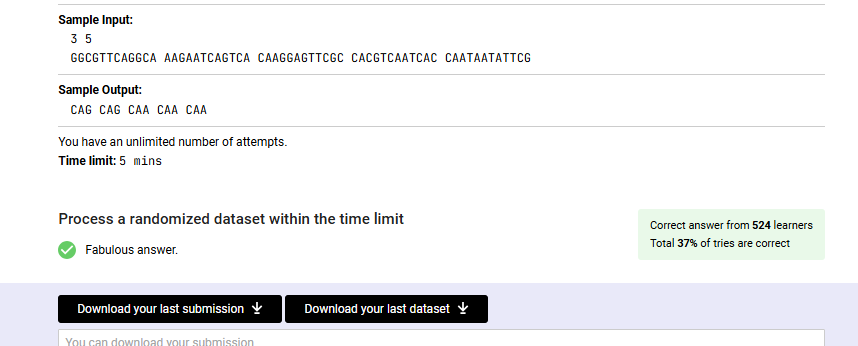

# 1.6 Motif Finding Meets Oliver Cromwell
================================


1.  **Cromwell's Rule:** The text introduces a statistical principle, inspired by Oliver Cromwell, which advises against using absolute probabilities of 0 or 1 for real-world events, as there's always a tiny chance of the unexpected.

2.  **The Problem with Zeroes:** The original `GreedyMotifSearch` algorithm suffers from a major flaw: it creates profile matrices with zero probabilities for nucleotides not seen in the current set of motifs.

3.  **Consequences of the Flaw:** A single zero in the profile matrix will cause any potential motif with a different nucleotide in that position to have an overall probability of zero, unfairly disqualifying many good candidates.

4.  **The Solution: Pseudocounts:** To fix this, bioinformaticians use **pseudocounts**, which involves adding small numbers to the raw nucleotide counts to prevent any probability from ever becoming zero.

5.  **Laplace's Rule of Succession:** The specific method discussed is Laplace's Rule, which in this context means adding 1 to every count in the count matrix before calculating the profile probabilities.

6.  **Improving the Algorithm:** The `GreedyMotifSearch` algorithm is modified to apply Laplace's Rule every time it forms a profile matrix from a set of motifs.

7.  **Increased Robustness:** This change makes the algorithm more resilient. It can recover from making a sub-optimal choice in one step because other, better motifs are no longer assigned a zero probability.

8.  **Example of Success:** An example demonstrates that even after the improved algorithm mistakenly selects a non-implanted k-mer, it can still find the correct implanted k-mer in the next string because of the non-zero probabilities.

9.  **Measurable Improvement:** Implementing pseudocounts provides a significant performance boost. On a test problem, the error score improved from 58 (poor) with the original algorithm to 41 (much better).

10. **Still Not Perfect:** The text concludes by noting that while pseudocounts greatly improve the greedy algorithm, there is still room for developing even more accurate motif-finding methods.

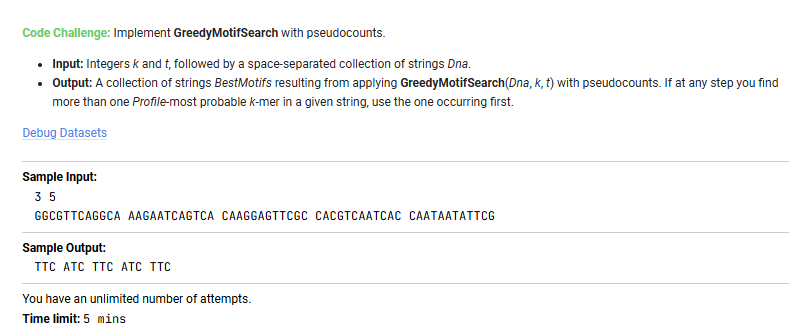

In [144]:
#@title Updating the Counts() and Profile() functions to pseudocount
def CountWithPseudocounts(Motifs):
    """
    Calculates the count matrix for a set of motifs using pseudocounts.
    Initializes each count to 1 instead of 0.
    """
    k = len(Motifs[0])
    # Initialize each count to 1 (the pseudocount) for every position.
    count = {symbol: [1] * k for symbol in "ACGT"}

    # Add the counts from the actual motifs.
    for motif in Motifs:
        for j, symbol in enumerate(motif):
            count[symbol][j] += 1

    return count

def ProfileWithPseudocounts(Motifs):
    """
    Calculates the profile matrix from a set of motifs using Laplace's Rule.
    """
    t = len(Motifs)
    k = len(Motifs[0])
    count = CountWithPseudocounts(Motifs)

    # The denominator is now t + 4 because we added four pseudocounts (one for
    # each of A, C, G, T) to each column's total count.
    denominator = t + 4

    profile = {s: [c / denominator for c in count[s]] for s in "ACGT"}

    return profile

In [145]:
def GreedyMotifSearch(Dna, k, t):
    # Step 1: start with first k-mers in each string
    BestMotifs = [dna[0:k] for dna in Dna]

    # Step 2: loop over all possible k-mers in the first string
    for i in range(len(Dna[0]) - k + 1):
        Motifs = [Dna[0][i:i+k]]   # Motif1
        # Step 3: for each subsequent string
        for j in range(1, t):
            profile = ProfileWithPseudocounts(Motifs)  # build profile from current motifs
            Motifs.append(Profile_most_probable_kmer(Dna[j], k, profile))
        # Step 4: compare score
        if score_motifs(Motifs) < score_motifs(BestMotifs):
            BestMotifs = Motifs
    return BestMotifs


In [149]:
#@title Dataset set given in the challenge
# Include the dataset parsing logic here to ensure Dna, k, and t are defined
dataset = """12 25
TTATTGCATGTACATTGGCGTTTATTCCTCGACGTATAGTCCCATGTAGCGGTGAACGAACGGAACTCCTCACATTATTTGCGGTGGAGCTGCTTTTGCAAACCACAATAAACGTTGCGTCGACACTTAGTCCCTCGCTATCATCAGCGTAGACGA CGGCGTTCAGATGCAGAAGCTCGTAGAGCGCTGCGTAATTTGTGGCGTGAACCGGGTGGACTGGGGTATTCCTGGCTAGTTAGTATAGGAGGGCTCGAAAGCTAGCGGCTGGTACCAATCAGACCCTTAGCCATCCTTCACAATGTAGAATCCCCG CCACGCTGCGTTGGACTCTTACGCTGCTCATCTGTACCGAGGGCGAAGCCATACCGTTTCTGGCCGATGAGGGTAGCAGAATCATCCGTTCCGATCATTCTCGAGGACAGGGTAGGGCTCCTTAAGAAGGATTGTTAAGAGAGCCCAGGGGAGAGC CGACTCTTACACAGGACCCGGGAAGACCGCAAGGTCGTGCAAGCAGTAGTTAACAGCCGCAAGCAGCATGACTATTTCAGCGATAAGATCAAGGTTCCTGCTGCCAAATATTGCTTGGTCGACTAGTGCACACATGTGAGATGGCAGATAATACAG TAGCTCGGATTTTGACCCTTACCCCTCTAACCAGCAACCACGGGTAATCCCTCCCTTCAGCTTCCAAAGGTGCTTATGGGATAGGCGTCGCATTATCAACGCCTCTCGCGGGTAAGCGACCTTGAATTTATTGGCGCCTTGAGTAGGACTGCAGGA CAAACCACTTACCTTCGTTGTCTAAGGATACACGTACGACCCTTAACCTAAAGGTCTATTTTGTCTGGTTCGTCCGGTGTAGTTTTATAGAACTACCAGTTATGCTCAAAAAACGTGATTAAGATGCGGCATGTAACAATTGGTTTGGGTATGTAA TAGCGCCTCCCTATACAAGAGTGCTCCTGACAGCATCGCCAGGTATTCGTCGTACCTCAGCCGTACTGTACCGCACCTCCAGAAGCAACGCATATTAGTTTCTTCCCTCGACACTTATGCAATCAGACTGCCCGCCCCATCCGTCGTTTCGGCTTT TGTGTCTTCCTAAGACTCTTAAACGACAACCGGTAGATACTTCGTCAGATTACTTACAGGGGATGGATTTCGGCTCAATGACGGCCGAGGTCATTGTGTTGATAAGTGTAACAGCTGATCGCTATGCACCCCGACAATCGTTTCTTTGATAATCGA TAAGAAACATCATTGGCCTCCCAGATTGTTTACCGATCCTTTAATGACGTCATGGTCTGATAAGCCGGCAAACTCGAGAATCGCCATACGGAGTACTGACCCTTATTCGCGCGTCGTATCGCCCGGCTAACAGAACCCTGACAGGGGGTCTCCCAA CGATTAGCTCCCGCGTCCGCTCAATCTCTTGGAGGCCGACGCTTAGCCTTATGTAGCTACCCCGACGCTTTTGTGGGGTGCACTGATCAATGGGAATATCTTGCCTCATTAGGTTTTCCACCCTCAGTCTGACTTTCGTAGTCCCCCCTCTTCCAG CGACTCTTATACTAGAGGCTCCCACCCCGAACTTATTCTTGCCGAGCCGACTGGGTGACGGCGCAGCACCGTATTGAGTGAATCAGTATGGTGAGTCCTATGTCAAGCCTGCGGAGTCTGGACTCATTTGCCAGTGGTCCTAAACCGGAACAGCGA TGGGTTACAGACGTTCGATTACTGGAATTAGGCGCTCTCCGTTGAGGGGCAAGTTAGCATCTGGCTACGTCATCGCTTTATGTGTTCTGAACCGGACGGGTCTCAATATGCGATTGCTCGCTTTCCATGCTAGGAAGGAGCGGGTGACGCTTATAC GGATGTGGTGCCAAGTGTGGTTCACCCACTGTGGCGAGACGCTTAAACAAATAGATTTACAGCTAAGGTATCCGGTCTAGAGCCCTAAAACTGTTCCTTTGTCTGTCTAATGCCTCCACTGAACGACTCTCGGACATGGGACACTGGGCTGGTACC AGACACTTAGCCAACAAGCCTGACAACAGAAATTTGCTGATCTTTCATCGACCCCTCGGCAGAGGGAGTTCATTGGGCTCTACTAGTAACAGTCCGGATCTGATAATTGTGCGTCATATAAACCGATGGGGTTTAGAGTCAAAGAAAGTTCGAGTT CGTGTCGGGCTAAAATGTTCGACACAAACCCCTGGGATTTCGTTAGGGAGACGCTTACGCGCCCAAAAATATGTGTATGGATAGATACTTGATAATAGATTACGTGCCGGACGGACCGGGTGTCAGGTGCATGCCCATGTACTCTATTTCACCAGG TATATGAATTTGGAATGCGTCCTGCTCACATACTATGATCGCAAACTTCGGCGAAATTACGTTGCATCAATCTTACCTACCTGCAGACTCTTAGTCAGTACGCGATGCCCGCGCAGGCACACGGCTGATCTGCTCAAGCATACCCTCGCGCTGGAG AGACCCTTACCCCAACCGTAACTGAAGACGCAAGGTCTCAATAGGTACAGGACGGGGGGCCAGTCCCCGGGGAACGGCGTATAGGCTGTTCTTGTGTACCGAACGAGGCTCCCTCCGGAGCGGTAGACGCTACCTTCTCGCTCGCTCACCGATACC ACTGGCTTTCGTCAGCACGCTCACGGGCATTGTACCCCGTTTCCAGACCACAGGTAAGAGACGCGGCTTGTGCGACTCTTACCCCATATATTATTCGCTCGACCACCGATCTTAACCGTTTAAACACCCAGAGTTGTGATACCGTCGAACCTCCCA TAACCTATTGATGGGGGGAAGCTTTAGTCGCAACGGTCCTGCAGGAACGTAAGACCCCGATGCCAGTATTCTGACTATTGCCCGGCACAATGCACTTGAGCTTTTGCTAGTCGCACCGGCGTCCAGCGTTCTGGACTCTTAACCTTAGGTGACGCC GCCAGTTGCTTTTGAATGCATAACGGTCGGCGCCCGAGTCGCGTCCTGTCTGCGCGTAAGCTATGTATATGCTGACCCTTACTCGACCGCGTACGCTCTACCCTACGCACGAACAAGAAGTCTCGTAAACCATTGCCTGGGAAAATAGATAGACCA TAGCTCGAAAAGATGCTACTCCCCCTTCTGCTCGTTAACCGTCTCACTTGACTCTTATGCCCCCACCATTTTATAGCATTAGGGAGCGTCCTAGTAACGTCTAAAGACTTCTACTCTAAACCCTATCTCACGCTCTCTGGCTTTCTTCAACGAGGT AATTATTGAGGTCCCCGCTTCCACACAACCCGTTTGACTTAGTGATGGAAAGGGTGTACTATCTCGAGGATGGGCAGAAACAGATGGCTCTGTGCAGGACACTTAGACTATGGTTGGTTAAAAAATGCTCAGTTATCAGTACCCAGTCCATTTGCG ACCAGTGGTATTTGTGGATACAACGGACGCTTAAACCCTTGTAGAACCGCGTCTGCGAAGTTTCGAAACGCTCAATTAATAATATAAATTCCTAAAAGCTGAATCTTGTATGCACGGATGAGGAAACAAACCGTCATTTCCCAAAGGCTGGTCACG TCAAGAGTTTCTGCATTCAAACGCCGATCCGATTTATTAGAACAGAAGGTGAACGTTAAGTATCCCCCATGACGACGCTTATACGTTTGTTTGTGCTCAGTATTATCAATGAAAAGCGCCTCGATTCGTTATCTCTAGGGTGTATAGCGCTAACGA CTGCGTTGCCTCTCAGCTCGATAAGGAATAGTGTGGTAACGTTGTAAGTCCCAATGGTTCTGTCGGCTTATACGTAGACTTTCTACGTGGGGCTAGTAAGTCTTTCCAGGACACTTATCCAGGTTATTGACGAACATGGCGGCTGGCCACGCAGCT"""

lines = dataset.strip().split("\n")
k, t_specified = map(int, lines[0].split())   # first line
Dna = lines[1:][0].split()                    # next t lines
t = len(Dna)             # next t lines

In [150]:
" ".join(map(str ,GreedyMotifSearch(Dna, k, t)))

'CGACACTTAGTC AGACCCTTAGCC GGACTCTTACGC CGACTCTTACAC TGACCCTTACCC CGACCCTTAACC CGACACTTATGC AGACTCTTAAAC TGACCCTTATTC CGACGCTTAGCC CGACTCTTATAC TGACGCTTATAC AGACGCTTAAAC AGACACTTAGCC AGACGCTTACGC AGACTCTTAGTC AGACCCTTACCC CGACTCTTACCC GGACTCTTAACC TGACCCTTACTC TGACTCTTATGC GGACACTTAGAC GGACGCTTAAAC CGACGCTTATAC GGACACTTATCC'

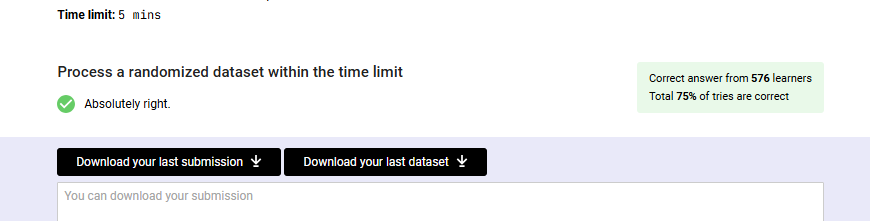

# 1.7 CS: Solving the Median String Problem

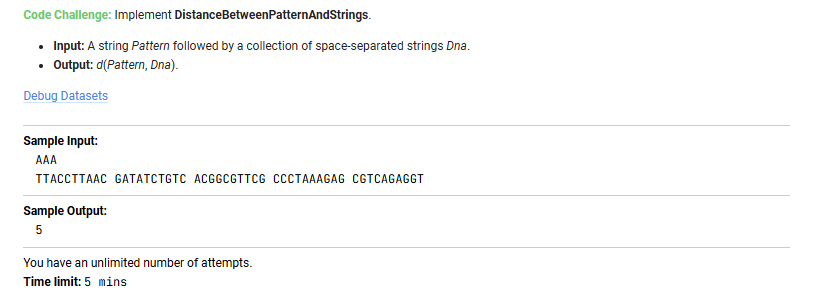

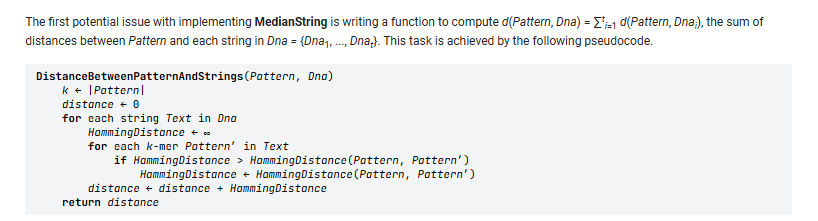

In [151]:
def distance_between_pattern_and_strings(pattern, dna):
    """
    Computes d(Pattern, Dna), the sum of minimum distances between a pattern
    and each string in a collection of DNA strings.

    Args:
        pattern (str): The k-mer pattern to compare against.
        dna (list of str): A collection of DNA strings.

    Returns:
        int: The total distance between the pattern and the DNA strings.
    """
    k = len(pattern)
    total_distance = 0

    # For each string Text in Dna
    for text in dna:
        # Initialize the minimum Hamming distance for this Text to infinity
        min_hamming_distance = float('inf')

        # Iterate through all possible k-mers (Pattern') in Text
        # The loop goes from the start of the string up to the last possible
        # starting point for a k-mer of length k.
        for i in range(len(text) - k + 1):
            kmer = text[i:i+k]

            # Calculate the distance between Pattern and the current k-mer
            current_distance = hamming_distance(pattern, kmer)

            # If this is the smallest distance found so far for this Text, update it
            if min_hamming_distance > current_distance:
                min_hamming_distance = current_distance

        # Add the best distance found in this Text to the overall total distance
        total_distance += min_hamming_distance

    return total_distance

In [161]:
#@title Dataset given in the challenge
dataset = """GGTTCAC
GGTCCATAAAATATACGATCGTATCCTGCCCTTTTGGACGTCTACTGCCCAGATGGGGCCCCTTGCATCTTTTGAATCCGTCATCATCAGGGGTATCATG AGGATAGACGCCTATCTTTCCAATCGACACACGCGACCTGCTCGGGGTAGAAGTAGACATGCGTTCCTCTGCCAGCATCAATAGGAAGCCTGACCTTCCG GTCAAGCAACTTGCCCTCAGTCTCATCGAGGCGCGAAAGGCCCACCTCAAACATTCTTGTAGATAAAGATGTGGCTTGCCCAAGTCTCACGCCGTCGAAA TTCAACAGGACTCCCGCGACCCAGCGGGTAGACAAGTACAACCCAACTTTCGTACGACCAAGTCAGACAACCGGTCTCAGTGCATCCGGTTACCTGGTTC GGTTTTTACTTTAACGATTAAGTGGCACCTGGAAATAACGCGTACCGTTCGACTAACTTTTTCCCCTCGTGAAGTATTCTTGTATGAATTTCCCTGTCCC CCTCCAAAAGGGTTCTCATATGCTGTCTTATAACGCCTGTAGTAACAATGTTCGTCCGCCGTTGCCGATTACCACTAACTTTTCTAGTGCTGCGGGACCG CGGCGACATTCCATCGTCTAACGTATACTCCCTTCGGGCCTTGACGTAATGAACCTATTAACAGGGGGTCTGCTTGTTATCAAGTATAGTGAGCAAACAA CACGTTCAGGTTCGCGTTCACGTGTGACATAGTGATGTAATCAGACCTAGGGGGAGGGGCCTCCCGCTCTAATAAGCCTAGTAATGATGTCCGAATAAAT GGGTGTCCTGTACGTTGCTGCGAATTGTTTCCCAATAGTAGGTGACATCTTCGGGGGGGCTTGTATATATGACGAAGCGGTAGCAGATCTGGATTTTAAC GAAGTTCACTTTTCTCCCAGTTAACATCTCTTTGGCGGGCTGAGTGTATTTGAATGGGACCGCATCTTGGGAAACCGTGACCATAAAGTGCCCTTCGCGT GGCTTGCACATACTCGCGAGCGGCTTATATAAAGCTATTGAGTAGGAAGACACATTGTCAAAAAGTCATTTCTGGCGCGATCTGGCCGAGTTGATACTTG CACCAGTCCACCGTAGAAGCAGACCGGCGGACAAGCCTGTCCGCATCGCAGATTACCGAAATTGCCCCCATGCGGAAGGTAGTTGGTGTTGTGTTGTATA CTAAGAAGACGCTAAACTATTGCATGGATCTACTAGAAAAAGAGAACATGTACTGTTGCTTGGGTAGTTGAAAATACCGCAGTCCGTATGAATATCCGGA TTCCTGTCTAAACCGATTTGACTGATTGCAATGGCCGATGCTCAAGTACGAACAGGGGTACCGGCCGTAGGCCCGTTGACCCGCGTTAGATCTGCGTTCG ACATTGTACGCTCTCTTGTTAATGGGAAGTTGCAAGACAAAATGAGCCGTGAGAAGACGTTCAATGGCTAGCTTTTAAGGGGCAAGTGATCTAGTATGGG ATTAGTAATAGATCGCATACAAGGGGGGCAGGACGACCATCGGGCCTAGGATCTGGCGTTCAAGTTGATCACGCCCGATCCTCTATAGTAGAAAGAAGCT CTACGGGATAGACCTTCACGACGTGTGCTTGACAATGCTTGCACTGGGCAAAGAAGACGTCTGTCATTGTTGGGTTTCGCGATCCGTACGCCTTAGGGGC TATCTCAGATGCTTGACCCCACCTGCTTTAACATGCCAGATGATAGAAGGAGACATGACGCCGTATATTTTCTGTATGCACGGACGTGCCCGTGCAGGGA CGCTTCCGAGCGGCCAAGGTCAGACCGACCATCGAGACCTTCTCAGTAGGAATCCACCGCGCAGGAGGGTTGTAGGAACGGCTCATTTCCCCTTCCATCA TGGTTACGCTAGCTGTTACCTGCAGGTTATACAACAGATAATCGAGTTCACTGCTCGTGAATAAGAGTACGGTTCTCTTCAGGAGGCCAGGGGCCGCGAA GTCAGTCACTCTTTCAGCCTAGAAAGAATATTTTCCTACTTAAGAAGCTGGAATCTAAGTAATTGAGGCGGATGATGAGCAGCTCTCTGCCCCGTCCAAA ACCCGAGCTTGGATGGATGCCGGGATTGCACTTGTCAGTATGCGAACTTGTATAGCTGACCTCTAAACACGGGAGATACTTGTCATCCAAACAGTTACTG TCTCTTCACTTGCCCCCCTACAACTTTAGACGCCTTTGTTTCAAATCATGTTGACATATCAGCTTGCATTCAAGAGAGCTTTGCGAATTGCCACGTTCGT AGGGCTGGGCGCTCTGCTGTCCAGCTGACGAGTACGGAGCAAGAGCAAGTCAAGTATTCCGAAGCCTCCGAACCTGCCTACCGTAGTTTCTAGAGTGTCA ACCCCCACTAGGGCGCGACGGGCTGTTCATAGAAGTGCTTCCATTGAGCGCAGGACCTTTCTTGGGTGCATCTCCTGGAATGACGAGCTTTCTGGCGAGT GTTACGTCGAGCTACGACCCTTCCAGGGCTGACACTATTCCATGGGTTACCTTAGATCATCACTACTTTTGTCCCGTGACCATACATCGCATTCAGATTC CTGTTAGCGGTTAGACCCCCTCCCATAGTTTGTAGTTATAATGAGCAGTTTGACAAAAAGTTTACGCCAGTCTGGTATCTATAACAAAACTGGTGATTTC GAGATCATGTACTGGGGATGTGATTAAGTGACGAACGGAGCGATCAGAACCTGGGAACCCTCGATCGAAAGGTGGCTTGACATTGAGGAAGTGTTACCTC ACAAGTCTGATTCAGTCCCTTGCACCGCGAGATTAATTCTCTTGATCCTCTTGATGGTGGCATGAGCTGAAATATACCACCGCAGTTTCCCGACTGCCTT GTGGCAATGATGGGCGTTATGGCACCTATACCATGGTTTGCAGGGGGCCCTCTCCAAACCCCCTTGCCTCTGCTCACTGTTGGATATAAAGCTGAGGTGC GGTGTAGAGAAGAAGAGCTGGTTGAACTCGTGCCGGTAACGACCCCCAAATCAACCGATTAAACAACAAATGATCGACACTTGCCAATTAGTCTTCTAAC CACCGCGTCATAGCGGTCACTGTGTAGATTATTCTGTTAGGGTTCATTCGTGACGTCGAATATACCACGCATAATGCACCTAAAAGCCCTGACCTATAAA CCATTTTTCGTGCCACTACACATACGCCTATTACCGCTGACCAGGCATGGGTTCGAGATTACTTGCCCACTAACAGGCGTTACCGCGTGTTCGATGAAGT CCTTAAGAGGGTCCCCAGGGACTGGATTATAAGACCACTATCGGTATTGATCTCTCTCGCGAGATGCGCTCAAACATGATGATTCTCAAATTGTTGAAGT CACTTATGAAGAGGGAATGCGAATGACACACCTGGCGTGGAGCCTGGACCTCAAGATATCGCCGGGTACGCAGGATCCCGTGTCACATCTTGGTGCCTTT TGACTTAGTTTGCGTCTCGTCTTTCCGGCCACCTGCACCTGATAGTAGCGCTGTATAACAAGCTTCTTGGCAAACCATGACATCTGAGGATCCAAGCAAT GTCATGTCGATTCACTAGGCTGTTGGACTTGGCGCTGCATCCTGCGTGAGAAGCCAGCGTTCAGGTAGGGTTTATAAGGGCCGGAGTCAAATGCGCCACC TATATTAAAGCATCTGTCACCCCCCCGGCGGTCCGTCTAGGAGAGTGATCCGGCCAGCATTGTGGTTAAGTAGTTTTTGGCGTGTTGTGTATCAAGTCTG GTTCACCTTATTTAGCGCCCCGACATTAGCGACTGCACGCGGCGTAGGTTTTTCACTGCACTAGCGTTCGCCTTAGTTACGCCGCGAAGGTGGTACTTCG AGATTAGTTGTGACTAACCGTGATAAAACCTACCCTGTTGTAGGACGAGGTTAATCGTGCCGTAACGTTAGTATTGGGTACCACCAATGACCATTTATAT
"""
Patterndna = dataset.strip().split()
pattern = Patterndna[0]
dna = Patterndna[1:]

In [163]:
distance_between_pattern_and_strings(pattern, dna)

83

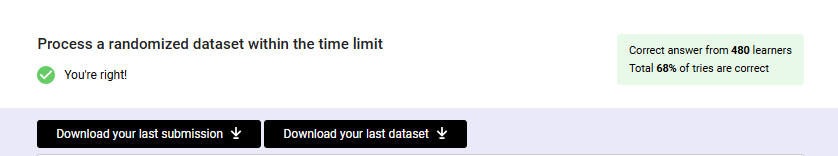

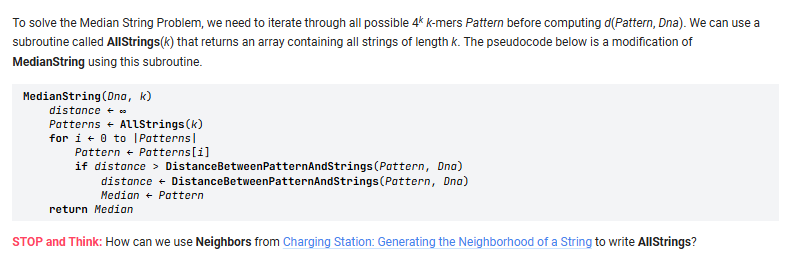